# Wine Review EDA

In [229]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option("max_rows",None)

sns.set_palette("Spectral")
sns.set_context('notebook',font_scale = 1.2)

In [230]:
# Read Data

wine = pd.read_csv("wine.csv", index_col=0)
wine.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [231]:
# Shape - Rows and columns

wine.shape

(129971, 13)

In [232]:
# Info

wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [233]:
# Null values

wine.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [234]:
# Checking the number of unique values present in all the columns

wine.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [235]:
# Statistical Summary

wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


* The values of points are distributed between 80 and 100.
* There is huge difference between 70% and max value in price column. We need to further check this.

# Points Distribution

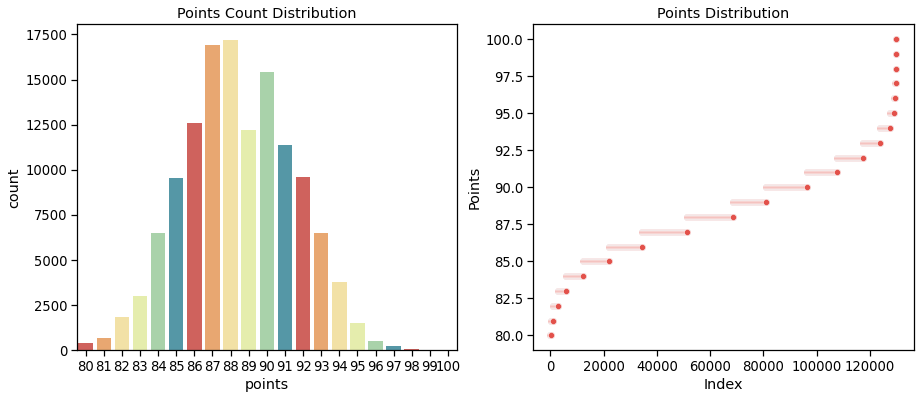

In [236]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(wine.points, palette=sns.color_palette('Spectral'))
plt.title("Points Count Distribution")

plt.subplot(1,2,2)
sns.scatterplot(range(wine.shape[0]), np.sort(wine.points.values))
plt.xlabel("Index")
plt.ylabel("Points")
plt.title("Points Distribution")

plt.show()

We can clearly see the data is normally distributed. Just a few number of wines have less than 82 points and more than 95 points.

# Let's set the Points into Categories.

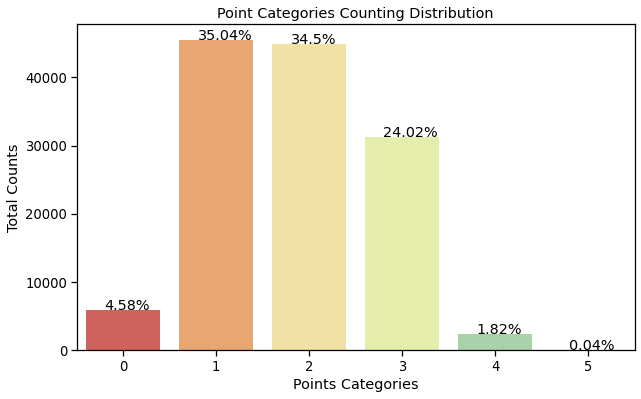

In [237]:
plt.figure(figsize=(10,6))

wine["point_cat"] = pd.cut(wine.points, bins=[0,83,87,90,94,98,100], labels=[0,1,2,3,4,5])

ax = sns.countplot(wine.point_cat)

for p in ax.patches:    
    height = p.get_height()
    value = round(100*(height/len(wine)),2)
    ax.annotate(str(value)+"%", (p.get_x()+0.20, p.get_height()+1.50))  

plt.title("Point Categories Counting Distribution")
plt.xlabel("Points Categories")
plt.ylabel("Total Counts")
plt.show()

# Detecting Outlier

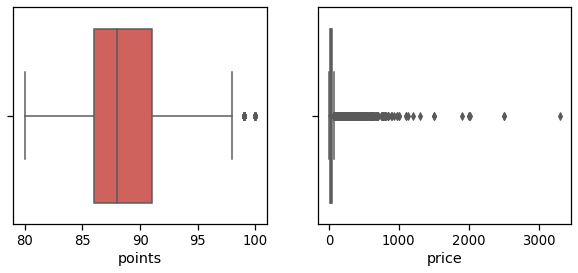

In [238]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(wine.points)

plt.subplot(1,2,2)
sns.boxplot(wine.price)

plt.show()

Outlier is present in the data, lets find out the outlier values.

In [239]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print("number of outliers:", len(outliers))
    print("max outlier value:", outliers.max())
    print("min outlier value:", outliers.min())
    print("outlier percentage:", 100*(len(outliers)/len(wine)))

In [240]:
find_outliers_IQR(wine.points)

number of outliers: 52
max outlier value: 100
min outlier value: 99
outlier percentage: 0.04000892506789976


In [241]:
find_outliers_IQR(wine.price)

number of outliers: 7241
max outlier value: 3300.0
min outlier value: 80.0
outlier percentage: 5.571242815705042


# Price Distribution

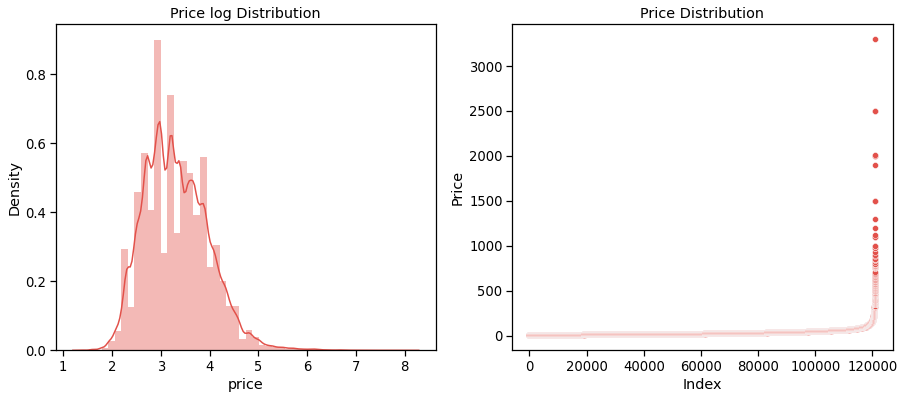

In [242]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(np.log(wine.price).dropna())
plt.title("Price log Distribution")

plt.subplot(1,2,2)
sns.scatterplot(range(wine.shape[0]), np.sort(wine.price.values))
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Price Distribution")

plt.show()

# Let's see a filtered distribution of Prices

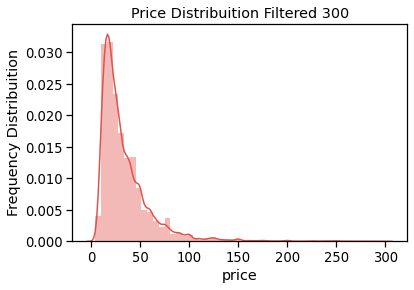

In [243]:
sns.distplot(wine[wine.price<300]["price"])
plt.title("Price Distribuition Filtered 300")
plt.ylabel("Frequency Distribuition")
plt.show()

The Greater part of all wine is under price 100.

# Checking if the higher points have higher price or not.    

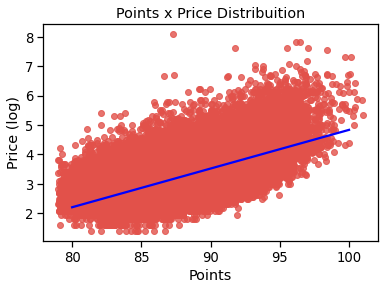

In [244]:
wine["price_log"] = np.log(wine.price)

sns.regplot(data=wine, x="points", y="price_log", x_jitter=True, fit_reg=True, line_kws={'color':'blue'})
plt.title("Points x Price Distribuition")
plt.xlabel("Points")
plt.ylabel("Price (log)")

plt.show()

From the above we can see that the highest price is laying between 85-90 points. Hence, we can say that, the highest prices isn't of the wine with highest points.

# Country Feature

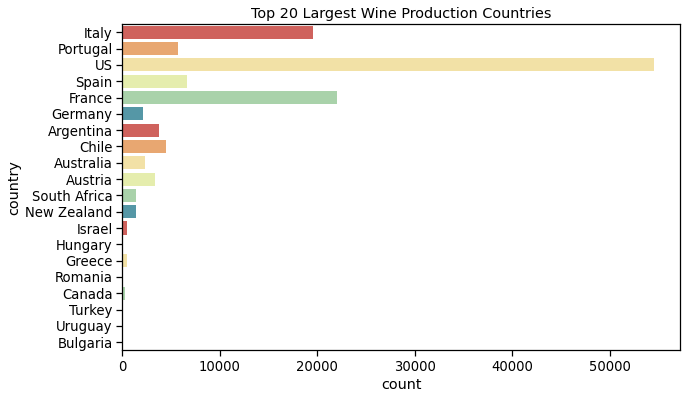

In [245]:
plt.figure(figsize=(10,6))
temp = wine.country.value_counts()[:20]
sns.countplot(y='country', data=wine[wine.country.isin(temp.index.values)], palette=sns.color_palette('Spectral'))

plt.title("Top 20 Largest Wine Production Countries")
plt.show()

US is the largest wine production country.

# Comparing the price and points(rating) of the top20 countries

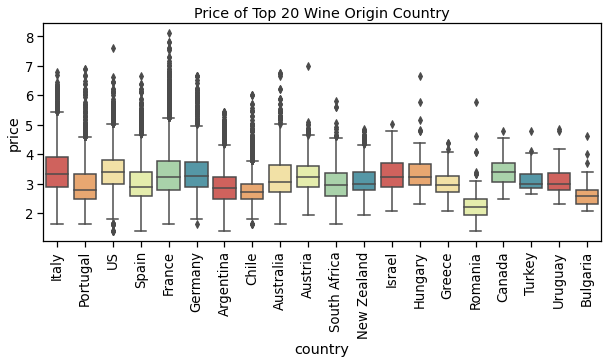

In [246]:
# Price
plt.figure(figsize=(10,4))
sns.boxplot(x='country',y="price_log", data=wine[wine.country.isin(temp.index.values)], palette=sns.color_palette('Spectral'))

plt.title("Price of Top 20 Wine Origin Country")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.show()

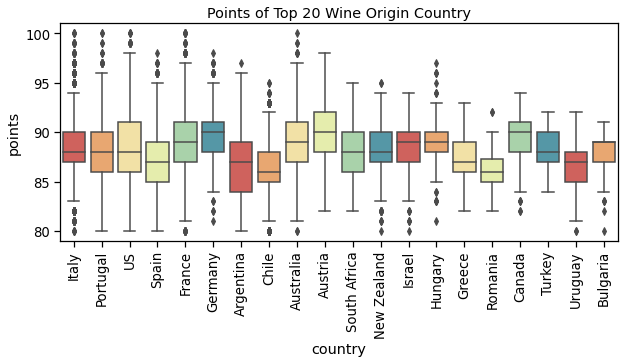

In [247]:
# Points

plt.figure(figsize=(10,4))
sns.boxplot(x='country',y="points", data=wine[wine.country.isin(temp.index.values)], palette=sns.color_palette('Spectral'))

plt.title("Points of Top 20 Wine Origin Country")
plt.xticks(rotation=90)
plt.show()

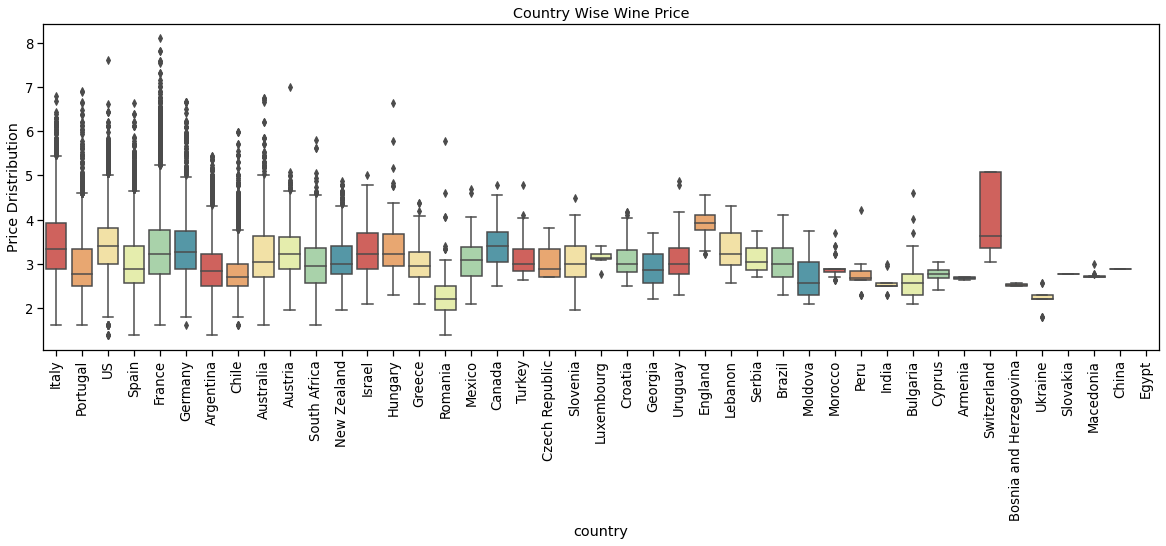

In [248]:
plt.figure(figsize=(20,6))
sns.boxplot(x='country',y="price_log", data=wine, palette=sns.color_palette('Spectral'))

plt.title("Country Wise Wine Price")
plt.ylabel("Price Dristribution")
plt.xticks(rotation=90)
plt.show()

It's very interesting that all wines have quartiles in a values lower than 100

# Province Exploration

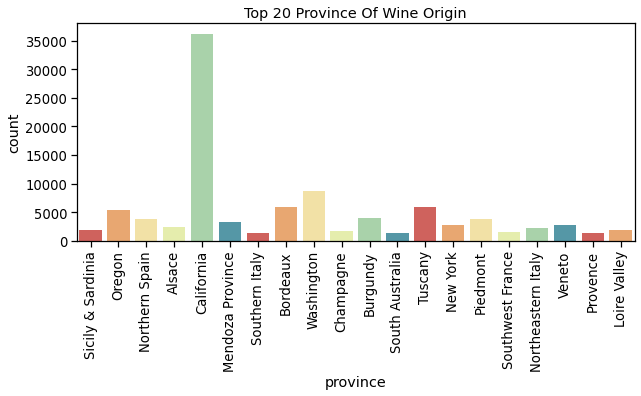

In [249]:
plt.figure(figsize=(10,4))
temp = wine.province.value_counts()[:20]

sns.countplot(x="province", data=wine[wine.province.isin(temp.index.values)] , palette=sns.color_palette('Spectral'))

plt.title("Top 20 Province Of Wine Origin")
plt.xticks(rotation=90)
plt.show()

# Comparing the price and points(rating) of the top20 province

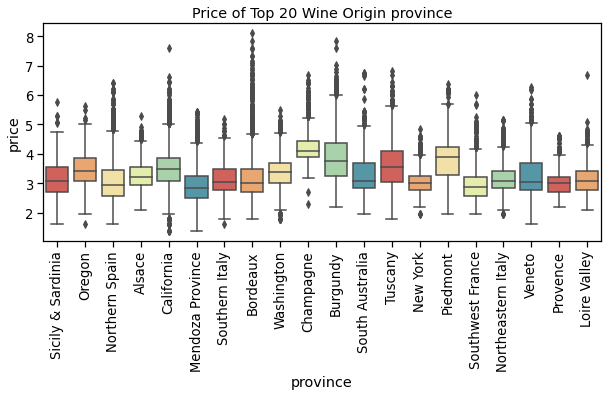

In [250]:
plt.figure(figsize=(10,4))
sns.boxplot(x='province',y="price_log", data=wine[wine.province.isin(temp.index.values)], palette=sns.color_palette('Spectral'))

plt.title("Price of Top 20 Wine Origin province")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.show()

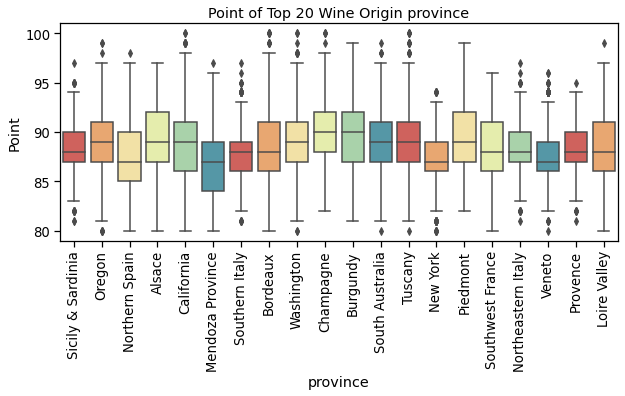

In [251]:
plt.figure(figsize=(10,4))
sns.boxplot(x='province',y="points", data=wine[wine.province.isin(temp.index.values)], palette=sns.color_palette('Spectral'))

plt.title("Point of Top 20 Wine Origin province")
plt.ylabel("Point")
plt.xticks(rotation=90)
plt.show()

# Taster

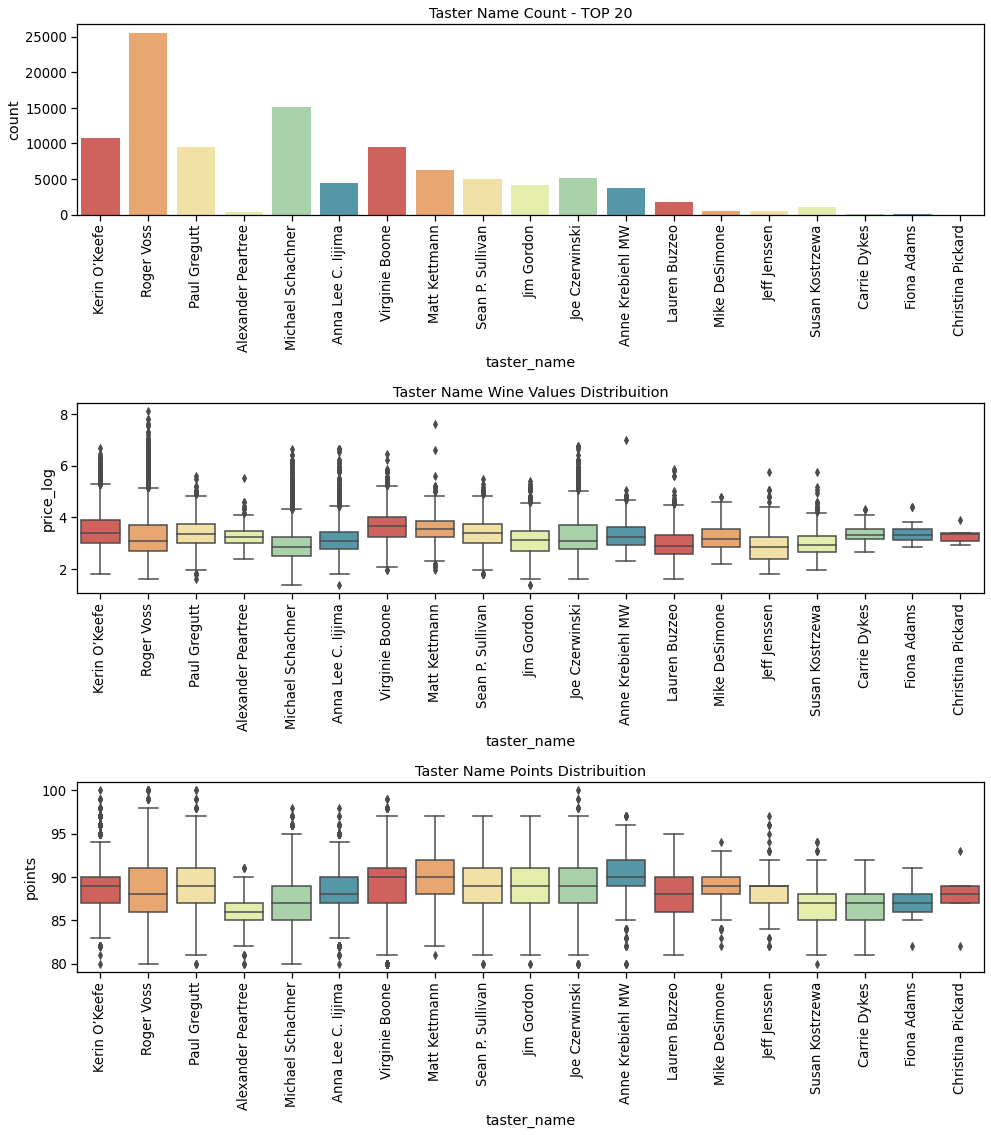

In [252]:
plt.figure(figsize=(14,16))

# Top 20 taster
plt.subplot(3,1,1)
sns.countplot(x="taster_name", data=wine , palette=sns.color_palette('Spectral'))
plt.title("Taster Name Count - TOP 20")
plt.xticks(rotation=90)

# Taster Vs Price
plt.subplot(3,1,2)
sns.boxplot(x="taster_name", y=wine.price_log , data=wine, palette=sns.color_palette('Spectral'))
plt.title("Taster Name Wine Values Distribuition")
plt.xticks(rotation=90)

# Taster VS Points
plt.subplot(3,1,3)
sns.boxplot(x="taster_name", y=wine.points , data=wine, palette=sns.color_palette('Spectral'))
plt.title("Taster Name Points Distribuition")
plt.xticks(rotation=90)

# plt.subplots_adjust(hspace = 0.6,top = 1.1)
plt.tight_layout()
plt.show()

# Top 20 Varities of Wine

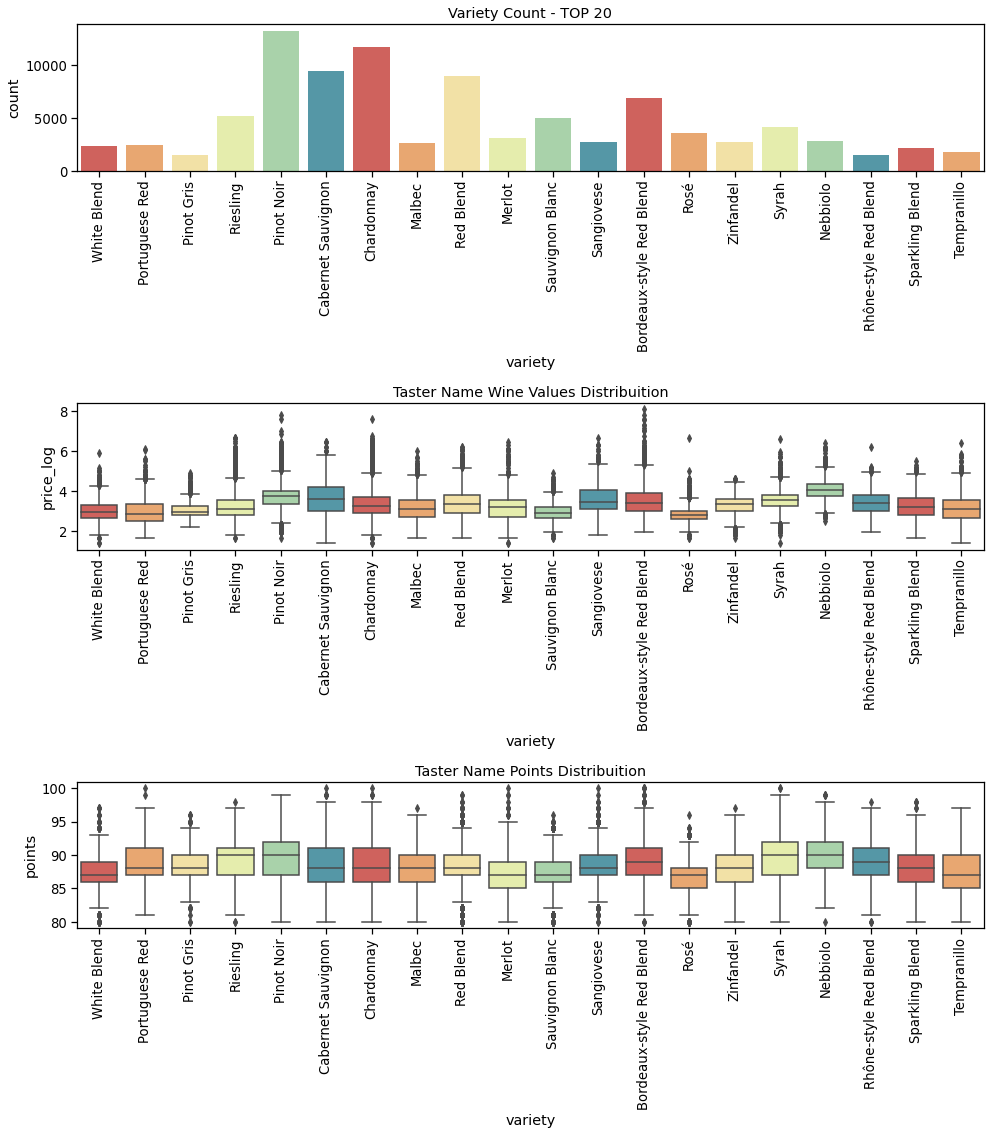

In [253]:
temp = wine.variety.value_counts()[:20]
data = wine[wine.variety.isin(temp.index.values)]

plt.figure(figsize=(14,16))

# Top 20 taster
plt.subplot(3,1,1)
sns.countplot(x="variety", data=data , palette=sns.color_palette('Spectral'))
plt.title("Variety Count - TOP 20")
plt.xticks(rotation=90)

# Taster Vs Price
plt.subplot(3,1,2)
sns.boxplot(x="variety", y=wine.price_log , data=data, palette=sns.color_palette('Spectral'))
plt.title("Taster Name Wine Values Distribuition")
plt.xticks(rotation=90)

# Taster VS Points
plt.subplot(3,1,3)
sns.boxplot(x="variety", y=wine.points , data=data, palette=sns.color_palette('Spectral'))
plt.title("Taster Name Points Distribuition")
plt.xticks(rotation=90)

# plt.subplots_adjust(hspace = 0.6,top = 1.1)
plt.tight_layout()
plt.show()

# END